In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift,estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score


Sobre o conjunto de dados

Contexto

Este conjunto de dados é criado apenas para fins de aprendizagem dos conceitos de segmentação de clientes, também conhecido como análise de cesta de compras. Você está devendo um supermercado e, por meio de cartões de sócio, tem alguns dados básicos sobre seus clientes, como ID do cliente, idade, sexo, renda anual e pontuação de gastos.
Pontuação de gastos é algo que você atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

Declaração do problema

Você é dono do shopping e deseja entender os clientes como quem pode convergir facilmente [Clientes-alvo] para que o sentido possa ser dado à equipe de marketing e planejar a estratégia de acordo.

In [2]:

# Carregar os dados
data = pd.read_csv('Mall_Customers.csv')

# Exibir as primeiras linhas do dataframe
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


 # Análise Exploratória de Dados (EDA)

In [5]:
# Verificar valores nulos
print(data.isnull().sum())


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


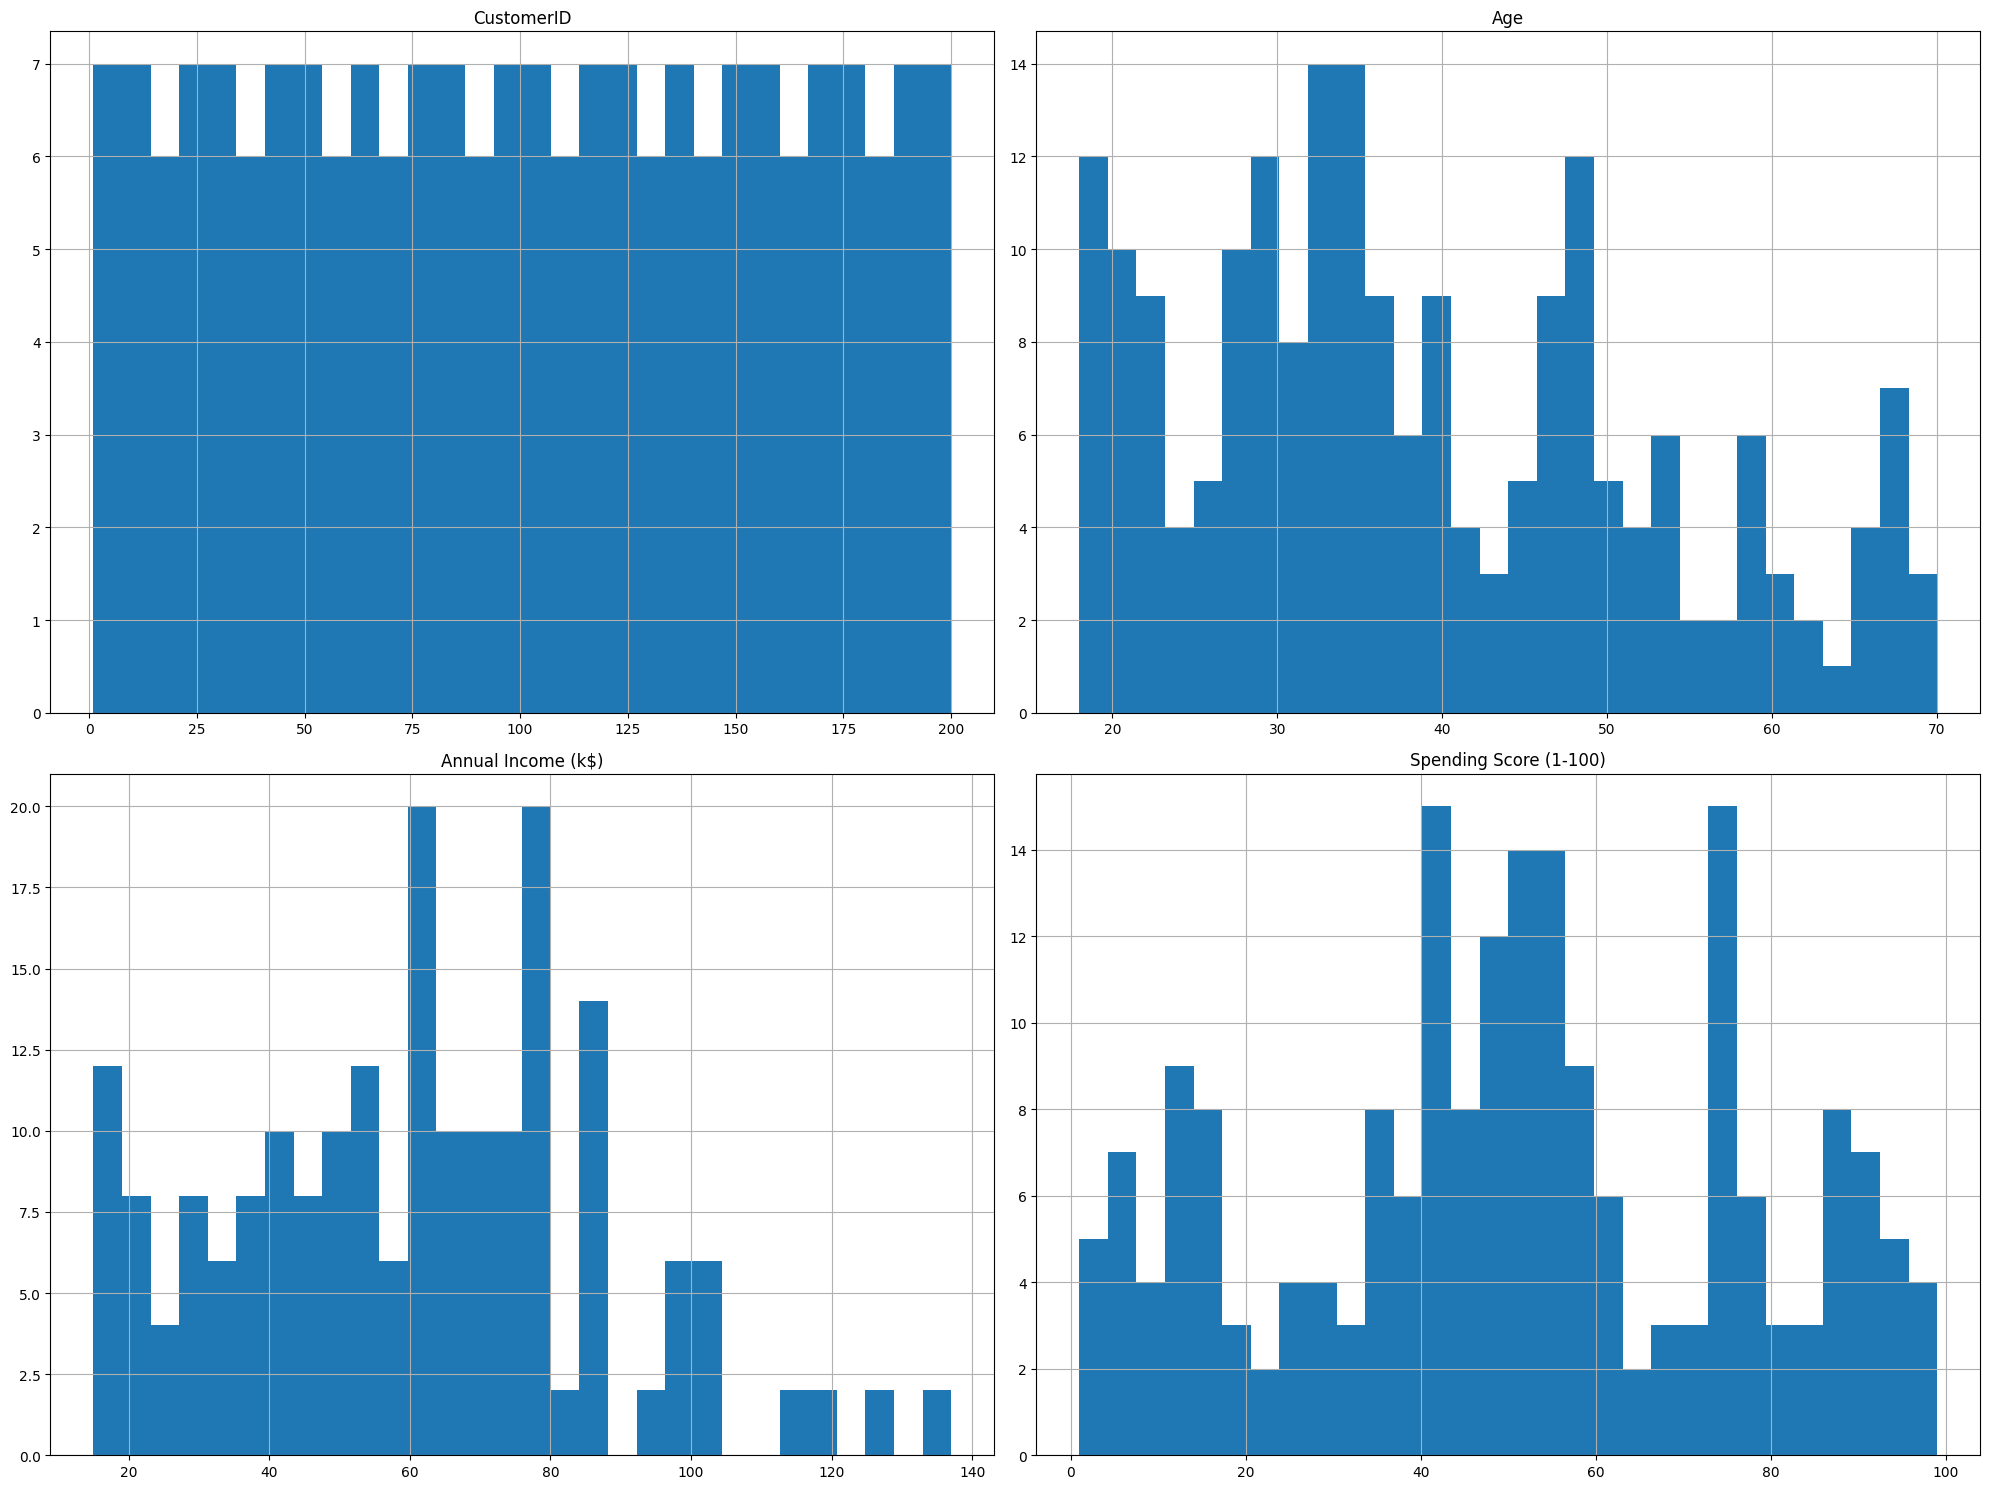

In [6]:
# Plotar a distribuição de cada variável
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()


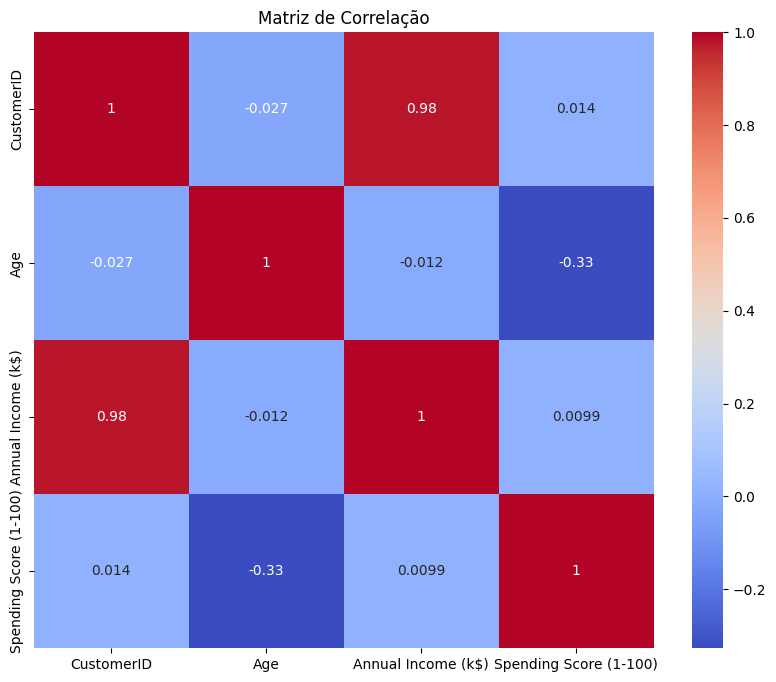

In [7]:
# Remover a coluna 'Gender' para calcular a matriz de correlação
data_corr = data.drop('Genre', axis=1)

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


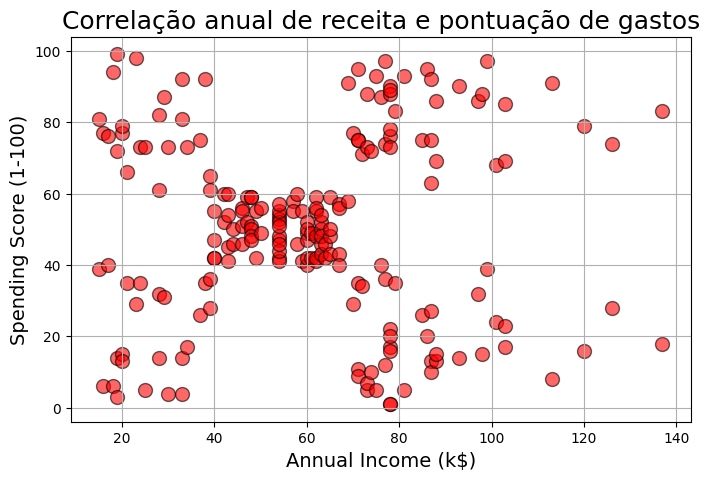

In [8]:
plt.figure(figsize=(8,5))
plt.title("Correlação anual de receita e pontuação de gastos",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

Estratégia

Portanto, exploraremos o agrupamento dos clientes com base em sua receita anual e pontuação de gastos para ver se há grupos distintos que o shopping possa atingir. Aprentemete conseguimos 5 clusters

# Pré-processamento dos Dados

In [9]:
data_filter = data[['Annual Income (k$)','Spending Score (1-100)']] #2 variaveis
print('Linha total : ', len(data_filter))

Linha total :  200


In [10]:
# Normalizar os dados
sf_data = StandardScaler()
data_scaled = sf_data.fit_transform(data_filter.astype(float))

In [11]:
# Função para calcular SSE
def calculate_sse(data, labels):
    sse = 0
    for label in set(labels):
        cluster_points = data[labels == label]
        centroid = cluster_points.mean(axis=0)
        sse += ((cluster_points - centroid) ** 2).sum()
    return sse

 # Implementação dos Algoritmos de Clusterização
## K-Means

Silhouette Score para K-Means: 0.5546571631111091
Davies-Bouldin Score para K-Means: 0.5722356162263352
SSE para K-Means: 65.56840815571681


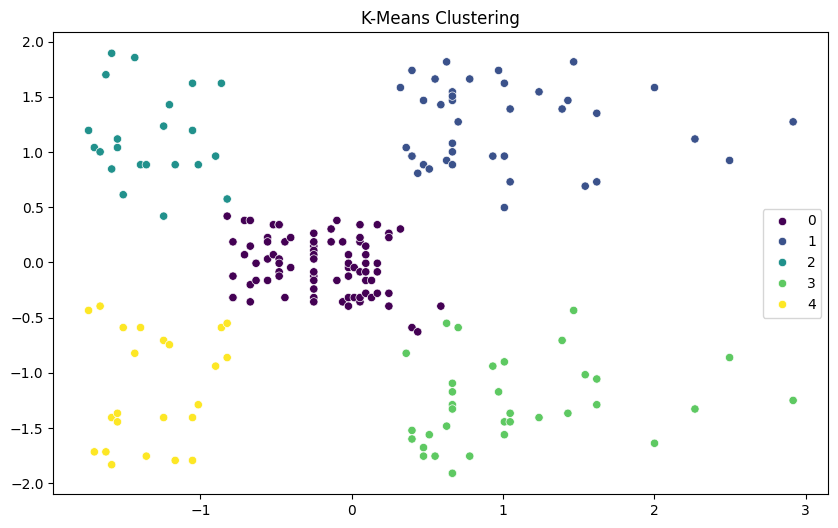

In [12]:
# Aplicar o K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
sse_kmeans = calculate_sse(data_scaled, kmeans_labels)
#rand_index_kmeans = adjusted_rand_score(data_scaled, kmeans_labels) - nao temos rotulos verdadeiros

print(f'Silhouette Score para K-Means: {silhouette_kmeans}')
print(f'Davies-Bouldin Score para K-Means: {davies_bouldin_kmeans}')
print(f'SSE para K-Means: {sse_kmeans}')
#print(f'Rand Index para K-Means: {rand_index_kmeans}')


# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()


## Aglomerative Clustering

Silhouette Score para Aglomerative Clustering: 0.5538089226688662
Davies-Bouldin Score para Aglomerative Clustering: 0.5778621190740154
SSE para Aglomerative Clustering: 66.51650404057513


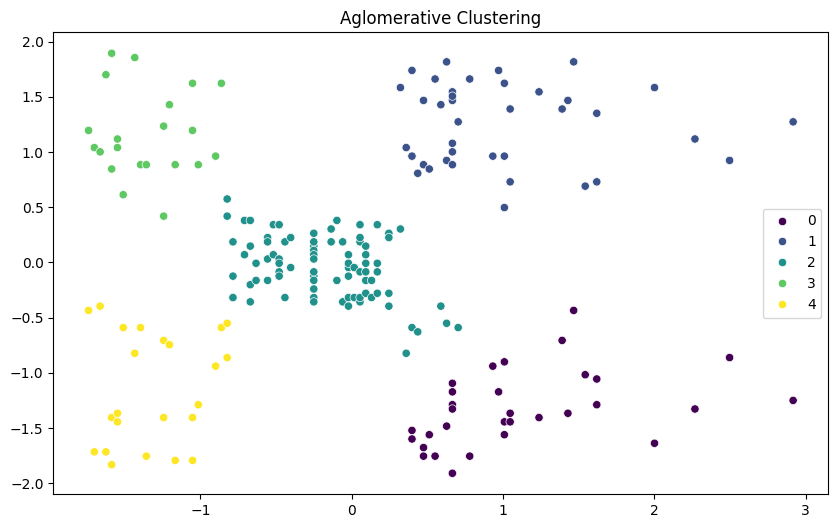

In [13]:
# Aplicar o Aglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_agg = silhouette_score(data_scaled, agg_labels)
davies_bouldin_agg = davies_bouldin_score(data_scaled, agg_labels)
sse_agg = calculate_sse(data_scaled, agg_labels)
#rand_index_agg = adjusted_rand_score(data_scaled, agg_labels)

print(f'Silhouette Score para Aglomerative Clustering: {silhouette_agg}')
print(f'Davies-Bouldin Score para Aglomerative Clustering: {davies_bouldin_agg}')
print(f'SSE para Aglomerative Clustering: {sse_agg}')
#print(f'Rand Index para Aglomerative Clustering: {rand_index_agg}')

# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=agg_labels, palette='viridis')
plt.title('Aglomerative Clustering')
plt.show()


## MeanShift

Silhouette Score para MeanShift: 0.5494510218238959
Davies-Bouldin Score para MeanShift: 0.569828629277065
SSE para MeanShift: 66.02827001726733


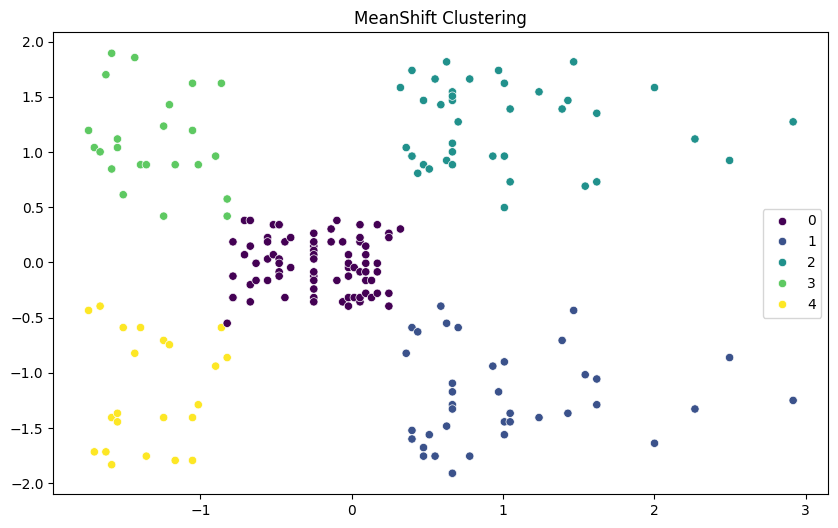

In [14]:
bandwidth = estimate_bandwidth(data_scaled, quantile=0.15)
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift_labels = mean_shift.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_mean_shift = silhouette_score(data_scaled, mean_shift_labels)
davies_bouldin_mean_shift = davies_bouldin_score(data_scaled, mean_shift_labels)
sse_mean_shift = calculate_sse(data_scaled, mean_shift_labels)
#rand_index_mean_shift = adjusted_rand_score(data_scaled, mean_shift_labels)

print(f'Silhouette Score para MeanShift: {silhouette_mean_shift}')
print(f'Davies-Bouldin Score para MeanShift: {davies_bouldin_mean_shift}')
print(f'SSE para MeanShift: {sse_mean_shift}')
#print(f'Rand Index para MeanShift: {rand_index_mean_shift}')
# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=mean_shift_labels, palette='viridis')
plt.title('MeanShift Clustering')
plt.show()


In [15]:
# Comparação dos Resultados
results = pd.DataFrame({
    'Algoritmo': ['KMeans', 'Agglomerative Clustering', 'MeanShift'],
    'Silhouette Score': [silhouette_kmeans, silhouette_agg, silhouette_mean_shift],
    'Davies-Bouldin Score': [davies_bouldin_kmeans, davies_bouldin_agg, davies_bouldin_mean_shift],
    'SSE': [sse_kmeans, sse_agg, sse_mean_shift]
})

print(results)

                  Algoritmo  Silhouette Score  Davies-Bouldin Score        SSE
0                    KMeans          0.554657              0.572236  65.568408
1  Agglomerative Clustering          0.553809              0.577862  66.516504
2                 MeanShift          0.549451              0.569829  66.028270


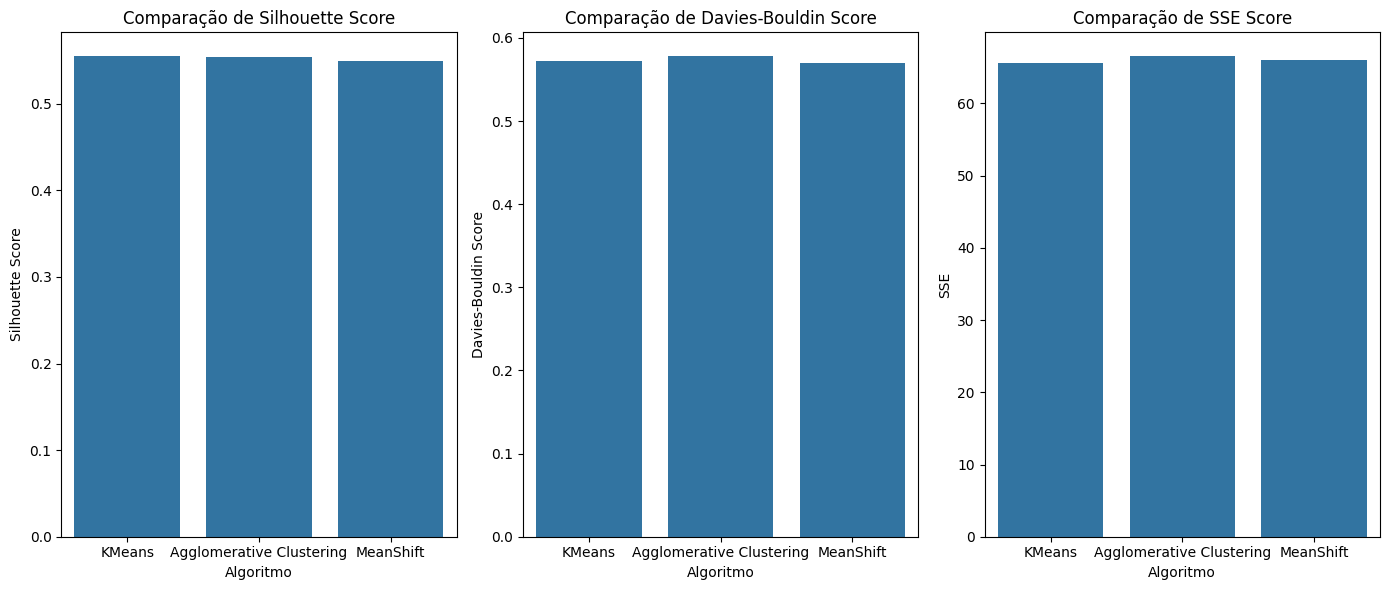

In [17]:
# Plotar as métricas de avaliação
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Plotar Silhouette Score
sns.barplot(x='Algoritmo', y='Silhouette Score', data=results, ax=ax[0])
ax[0].set_title('Comparação de Silhouette Score')

# Plotar Davies-Bouldin Score
sns.barplot(x='Algoritmo', y='Davies-Bouldin Score', data=results, ax=ax[1])
ax[1].set_title('Comparação de Davies-Bouldin Score')
# Plotar Davies-Bouldin Score
sns.barplot(x='Algoritmo', y='SSE', data=results, ax=ax[2])
ax[2].set_title('Comparação de SSE Score')
plt.tight_layout()
plt.show()

In [20]:
# Determinar o melhor algoritmo com base nas métricas
best_silhouette = results.loc[results['Silhouette Score'].idxmax()]
best_davies_bouldin = results.loc[results['Davies-Bouldin Score'].idxmin()]
best_sse = results.loc[results['SSE'].idxmin()]
print(f"Melhor Algoritmo com base no Silhouette Score: {best_silhouette['Algoritmo']} com Silhouette Score de {best_silhouette['Silhouette Score']}")
print(f"Melhor Algoritmo com base no Davies-Bouldin Score: {best_davies_bouldin['Algoritmo']} com Davies-Bouldin Score de {best_davies_bouldin['Davies-Bouldin Score']}")
print(f"Melhor Algoritmo com base no SSE Score: {best_sse['Algoritmo']} com SSE Score de {best_sse['SSE']}")

Melhor Algoritmo com base no Silhouette Score: KMeans com Silhouette Score de 0.5546571631111091
Melhor Algoritmo com base no Davies-Bouldin Score: MeanShift com Davies-Bouldin Score de 0.569828629277065
Melhor Algoritmo com base no SSE Score: KMeans com SSE Score de 65.56840815571681
